## Importing libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [105]:
df=pd.read_csv('train.csv')
df.head(5)

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [106]:
test_df=pd.read_csv('test.csv')
test_df.head(5)

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [107]:
submission_df=pd.read_csv('Sample__submission.csv')
submission_df

,id,price1
0,19841,193
1,19157,340
2,19445,637
3,8046,679
4,4571,190
...,...,...
5239,14488,727
5240,6273,805
5241,12429,673
5242,8847,130


In [108]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

#### Feature engineering

In [109]:
df['iswomen'] = ['Women' if 'omen' in x else 'Men' for x in df['title']]


In [110]:
df

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,iswomen
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,Women
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,Men
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,Women
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,Men
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0,Women
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1,Women
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1,Women
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1,Men


In [111]:
test_df['iswomen'] = ['Women' if 'omen' in x else 'Men' for x in test_df['title']]

In [112]:
df['maincateg'].fillna(df['iswomen'],inplace=True)
test_df['maincateg'].fillna(test_df['iswomen'],inplace=True)

<AxesSubplot:>

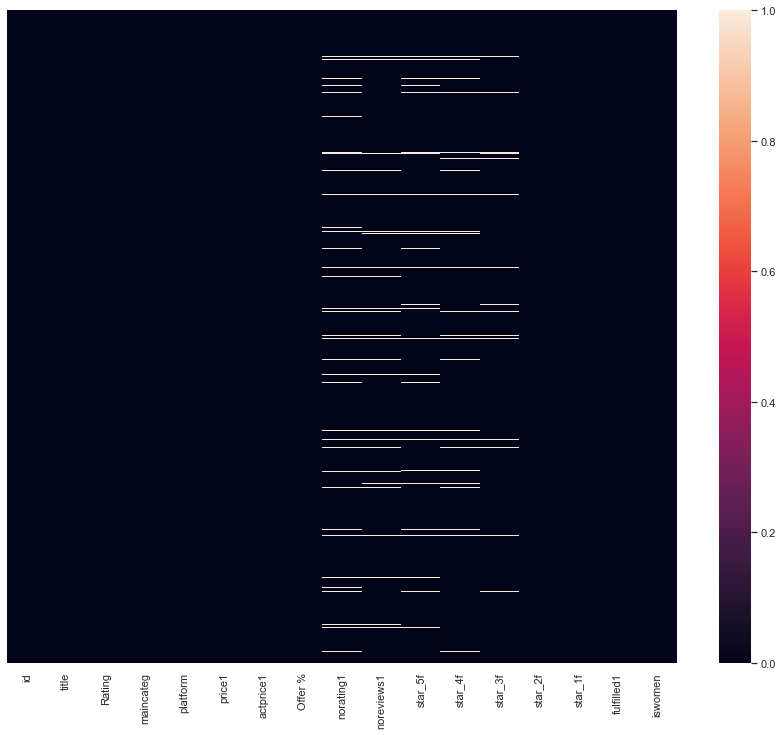

In [113]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(),yticklabels=False)

<AxesSubplot:>

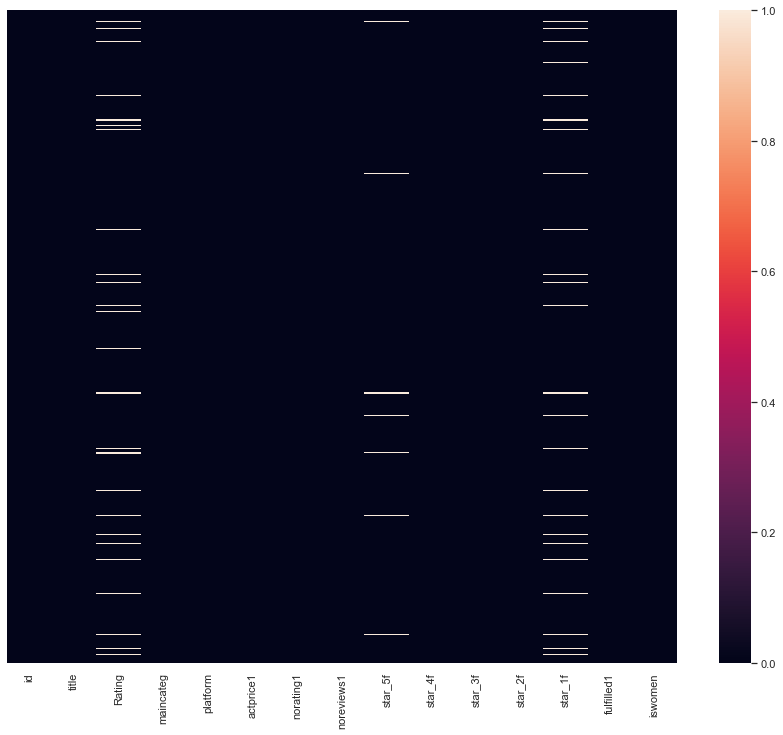

In [114]:
plt.figure(figsize=(15,12))
sns.heatmap(test_df.isnull(),yticklabels=False)

#### Removing rows with high number of nan values

In [115]:
df1=df.dropna(thresh=14,axis=0)

In [116]:
df1.shape

(15379, 17)

<AxesSubplot:>

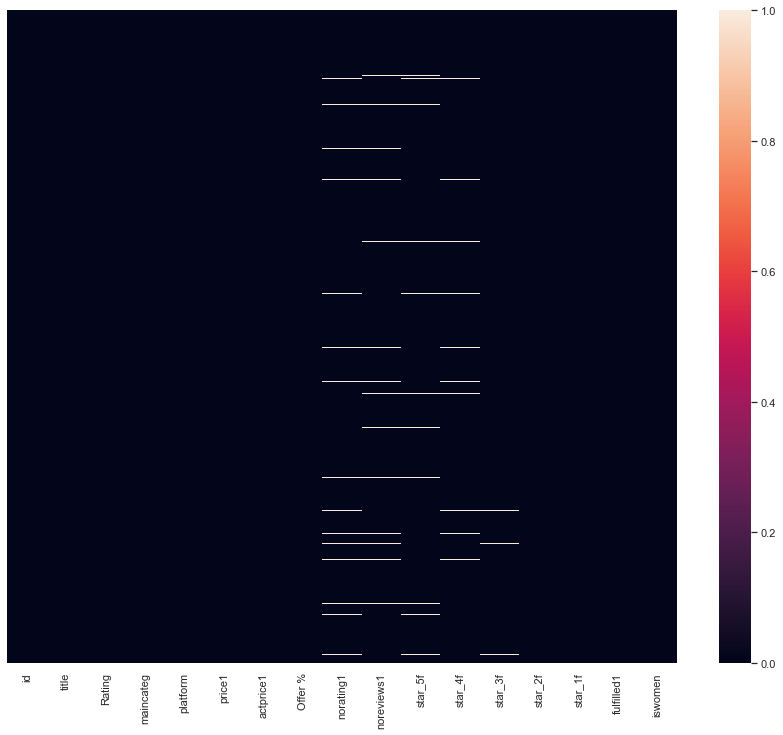

In [117]:
plt.figure(figsize=(15,12))
sns.heatmap(df1.isnull(),yticklabels=False)

In [118]:
df1.isna().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     338
noreviews1    251
star_5f       259
star_4f       222
star_3f        64
star_2f         0
star_1f         0
fulfilled1      0
iswomen         0
dtype: int64

In [119]:
df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,iswomen
1197,1099,DOCTOR EXTRA SOFT Ortho Care Diabetic Orthopae...,4.0,Men,Flipkart,499,799,37.55%,3046.0,425.0,0.0,0.0,0.0,0,0,1,Men
1413,12126,Jutis For Men (Tan),4.3,Men,Flipkart,1530,1699,9.95%,22.0,5.0,0.0,0.0,0.0,0,0,0,Men
1578,16727,"Cosko Sports Shoes,Running Shoes,Walking Shoes...",4.1,Men,Flipkart,699,999,30.03%,122519.0,17774.0,0.0,0.0,0.0,0,0,1,Men
1783,1108,Women Multicolor Wedges Sandal,4.1,Women,Flipkart,845,1690,50.00%,53.0,10.0,0.0,0.0,0.0,0,0,1,Women
1997,12141,Ladies New casuals Boots For Women (Black),3.4,Women,Flipkart,899,999,10.01%,8.0,0.0,0.0,0.0,0.0,0,0,0,Women
2084,10286,Jutis For Men (Brown),4.0,Men,Flipkart,498,499,0.20%,441.0,40.0,0.0,0.0,0.0,0,0,0,Men
2368,1084,Lace Up For Men (Maroon),4.4,Men,Flipkart,2195,3990,44.99%,27.0,5.0,0.0,0.0,0.0,0,0,1,Men
2487,10356,Women Pink Flats Sandal,4.0,Women,Flipkart,699,999,30.03%,116.0,16.0,0.0,0.0,0.0,0,0,0,Women
3449,20022,Corporate Casuals For Men (Black),4.0,Men,Flipkart,421,999,57.86%,2224.0,330.0,0.0,0.0,0.0,0,0,1,Men
3726,12745,Modern Runner Running Shoes For Men (Black),4.1,Men,Flipkart,1799,2999,40.01%,9.0,0.0,0.0,0.0,0.0,0,0,1,Men


In [120]:
## Treating incorrect values

In [121]:
df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0]=df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0].replace(0,np.nan)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\123482917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0]=df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0].replace(0,np.nan)


In [122]:
df1[df1['star_2f']==0]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,iswomen
27,19308,Boots For Women (Brown),4.2,Women,Flipkart,599,999,40.04%,10.0,0.0,6.0,2.0,1.0,0.0,1.0,1.0,Women
30,17412,Trendy Look Up Jeans And Kurta Pajama/Syntheti...,3.8,Men,Flipkart,499,999,50.05%,21.0,4.0,13.0,2.0,0.0,0.0,6.0,0.0,Men
40,10752,Women's/Ladies/Female/Girls Lightweight Comfor...,4.4,Women,Flipkart,525,999,47.45%,5.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,Women
51,3239,DD66_4 Jutis For Women (White),4.5,Women,Flipkart,1499,2500,40.04%,13.0,1.0,11.0,0.0,1.0,0.0,1.0,0.0,Women
53,12960,"Men Tan, Beige, Yellow Sandal",4.2,Men,Flipkart,389,999,61.06%,19.0,2.0,12.0,2.0,3.0,0.0,2.0,0.0,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15673,1806,Boots For Women (Burgundy),4.5,Women,Flipkart,1589,5299,70.01%,88.0,17.0,58.0,22.0,5.0,0.0,4.0,0.0,Women
15680,6567,Extra Soft Sneakers For Women (Yellow),4.5,Women,Flipkart,699,999,30.03%,22.0,1.0,16.0,2.0,3.0,0.0,1.0,1.0,Women
15713,20375,Boots For Women (Black),3.5,Women,Flipkart,479,550,12.91%,6.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,Women
15724,16403,Mojaris For Men (Brown),5.0,Men,Flipkart,649,2199,70.49%,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,Men


In [123]:
df1.isna().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     338
noreviews1    255
star_5f       304
star_4f       267
star_3f       109
star_2f        45
star_1f        45
fulfilled1     15
iswomen         0
dtype: int64

In [124]:
df1['fulfilled1']=df1['fulfilled1'].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\947064795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fulfilled1']=df1['fulfilled1'].fillna(0)


#### Imputing missing values 

In [125]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# from sklearn.linear_model import LinearRegression
# lr=LinearRegression()
mice_cols = ['Rating','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f']

# Define MICE Imputer and fill missing values
imputer = IterativeImputer()
df1[mice_cols]=imputer.fit_transform(df1[mice_cols])
test_df[mice_cols]=imputer.transform(test_df[mice_cols])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\1973608177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[mice_cols]=imputer.fit_transform(df1[mice_cols])


In [126]:
df1.shape

(15379, 17)

In [127]:
df1['review%']=df1['noreviews1']/df1['norating1']*100

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\2027789631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review%']=df1['noreviews1']/df1['norating1']*100


<AxesSubplot:xlabel='norating1', ylabel='review%'>

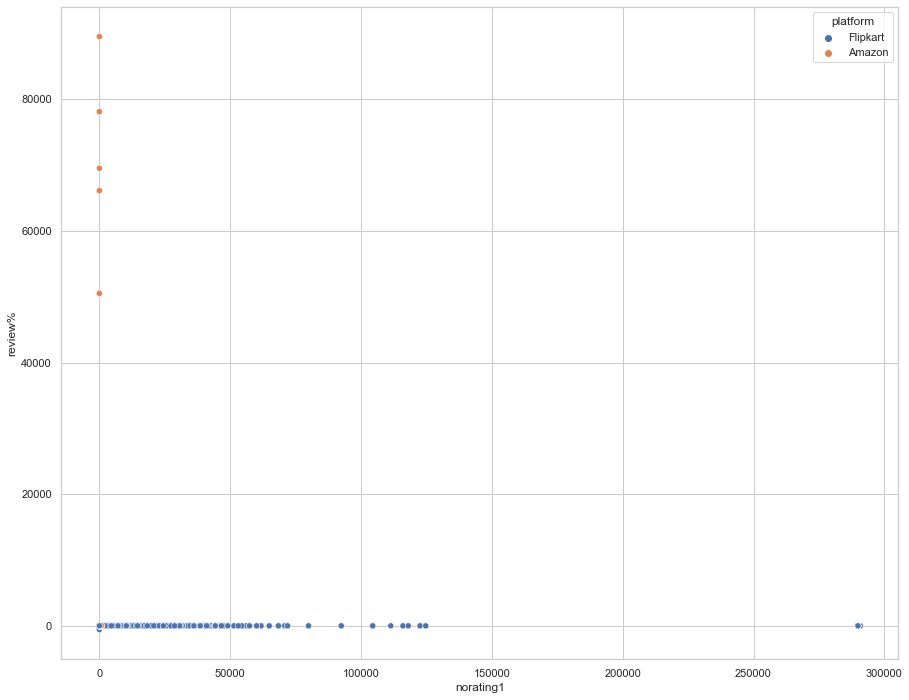

In [128]:
%matplotlib inline
plt.figure(figsize=(15,12))
sns.scatterplot(data=df1,x='norating1',y='review%',hue='platform')

In [129]:
df1.loc[df1['review%']>100]
df1.drop(df1.index[df1['review%'] >100], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\1585428406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.index[df1['review%'] >100], inplace=True)


<AxesSubplot:xlabel='Rating'>

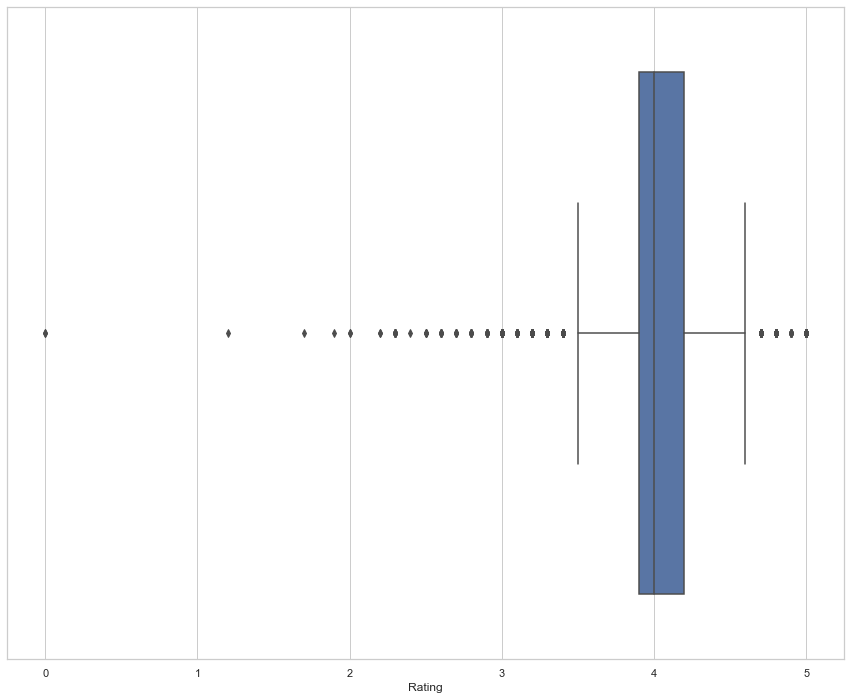

In [130]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df1,x='Rating')


<AxesSubplot:xlabel='platform', ylabel='count'>

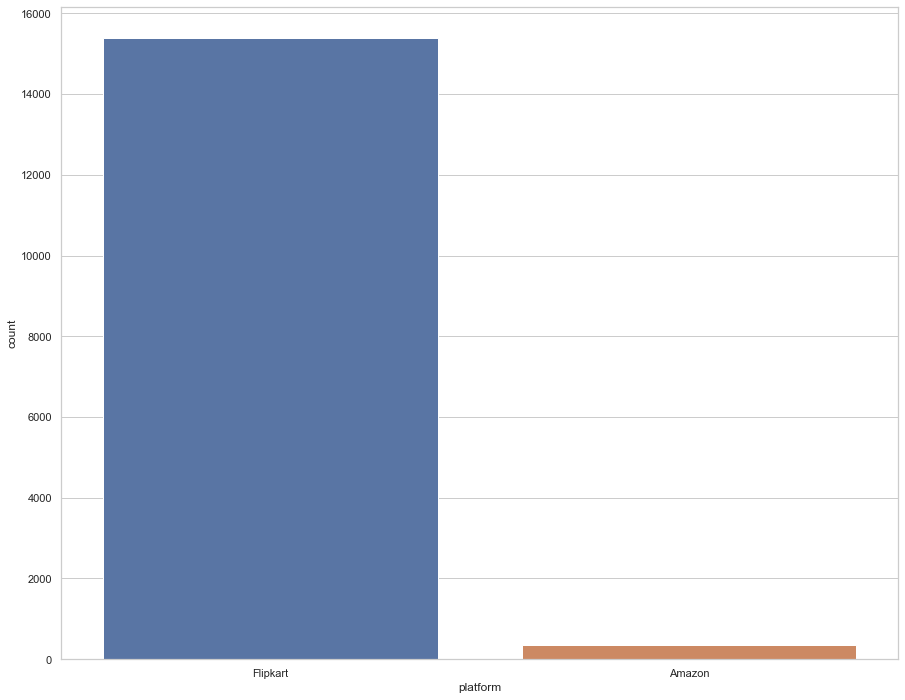

In [131]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.countplot(data=df,x='platform')

<AxesSubplot:xlabel='price1'>

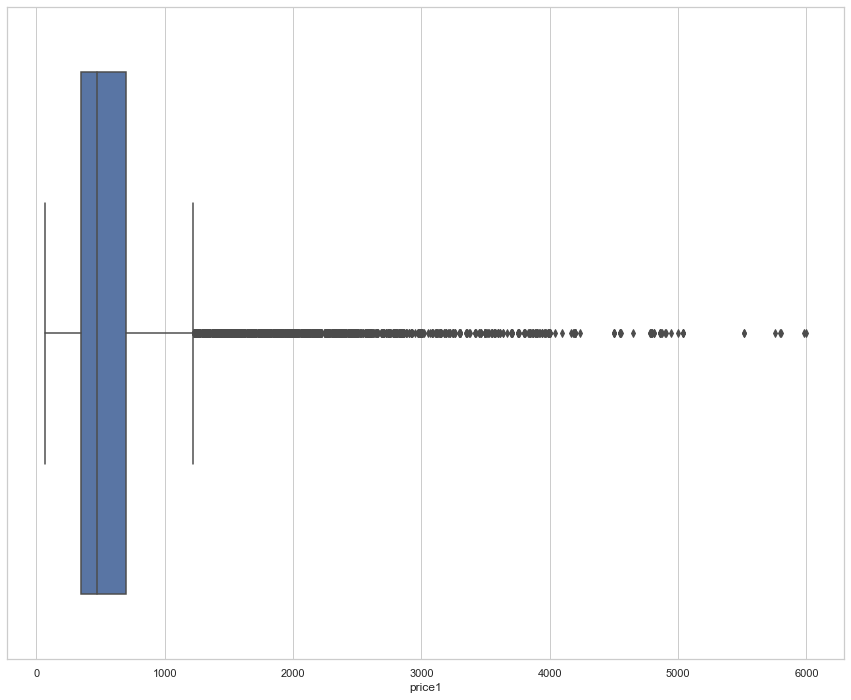

In [132]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df,x='price1')

<AxesSubplot:xlabel='actprice1'>

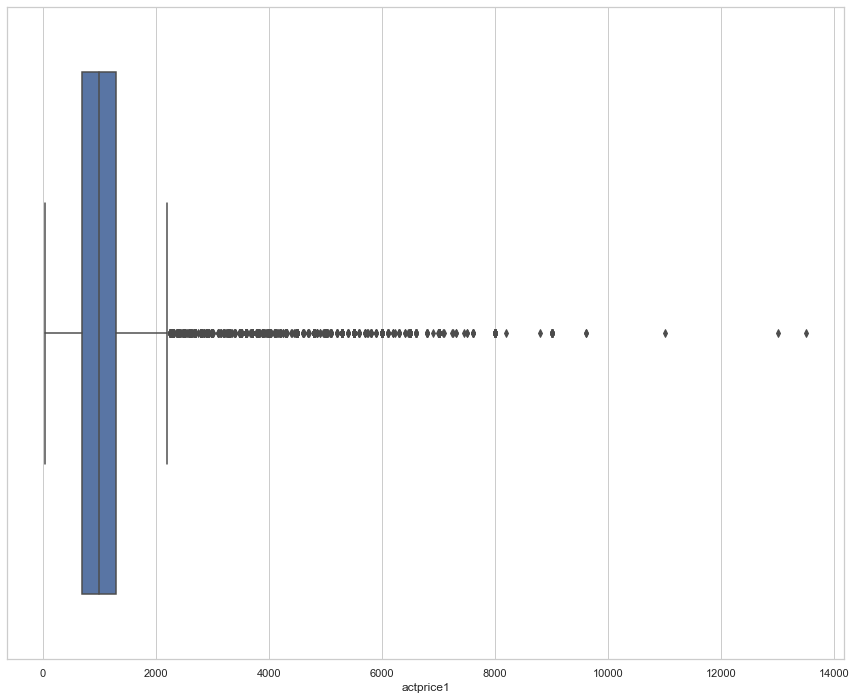

In [133]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df,x='actprice1')

<AxesSubplot:xlabel='norating1'>

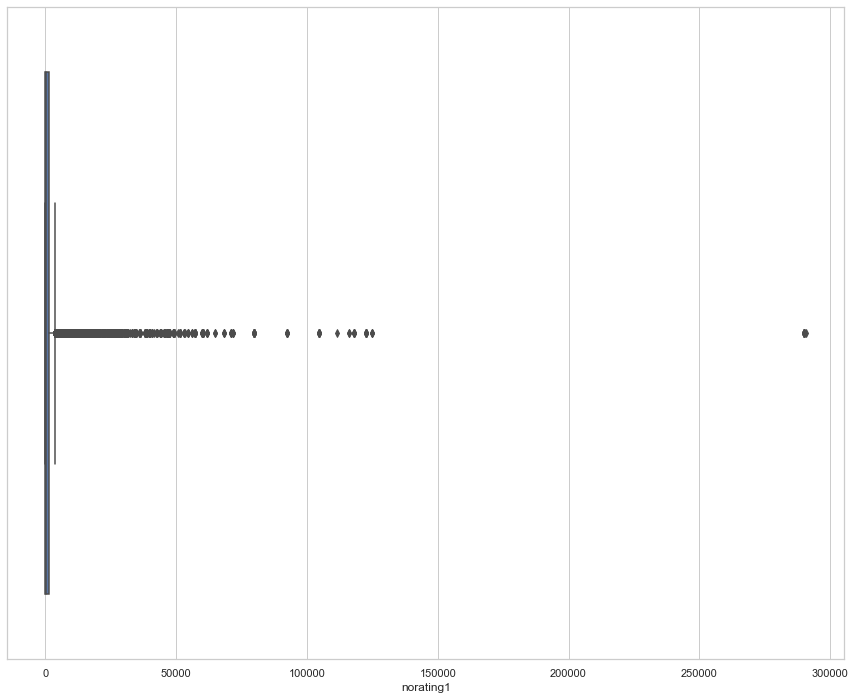

In [134]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df1,x='norating1')

In [135]:
df[df['norating1']>75000].shape

(57, 17)

<AxesSubplot:xlabel='noreviews1'>

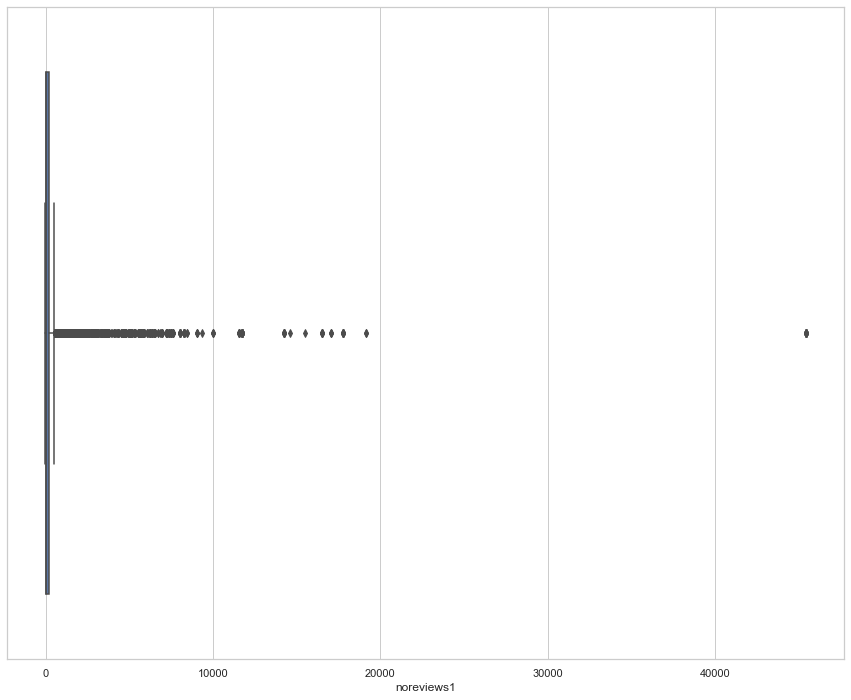

In [136]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df1,x='noreviews1')

<AxesSubplot:xlabel='fulfilled1', ylabel='count'>

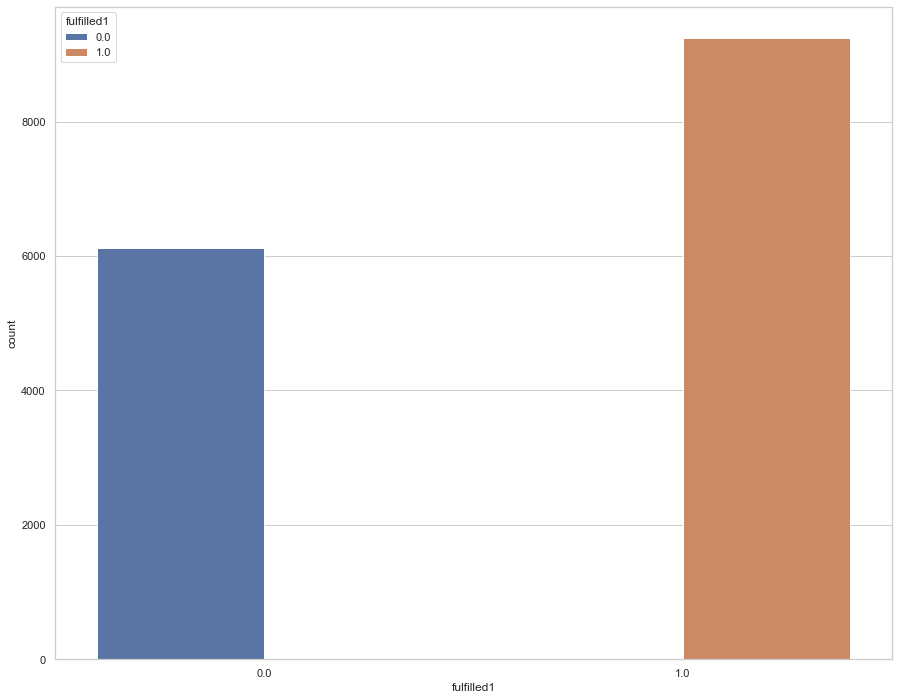

In [137]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.countplot(data=df1,x='fulfilled1',hue='fulfilled1')

<AxesSubplot:xlabel='Rating', ylabel='price1'>

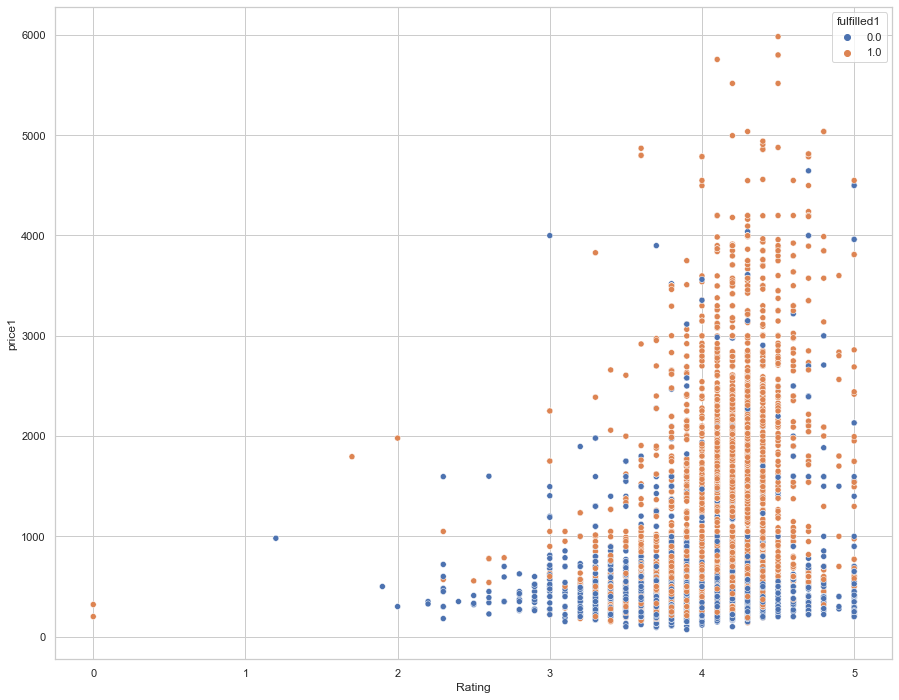

In [138]:
plt.figure(figsize=(15,12))
# sns.set_theme(style="whitegrid")
sns.scatterplot(data=df1,x='Rating',y='price1',hue='fulfilled1')

In [139]:
df1["Offer %"]=df1["Offer %"].str.replace("%","")
df1['Offer %'] = df1['Offer %'].astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\2928584276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Offer %"]=df1["Offer %"].str.replace("%","")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\2928584276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Offer %'] = df1['Offer %'].astype(float)


<AxesSubplot:xlabel='Rating', ylabel='count'>

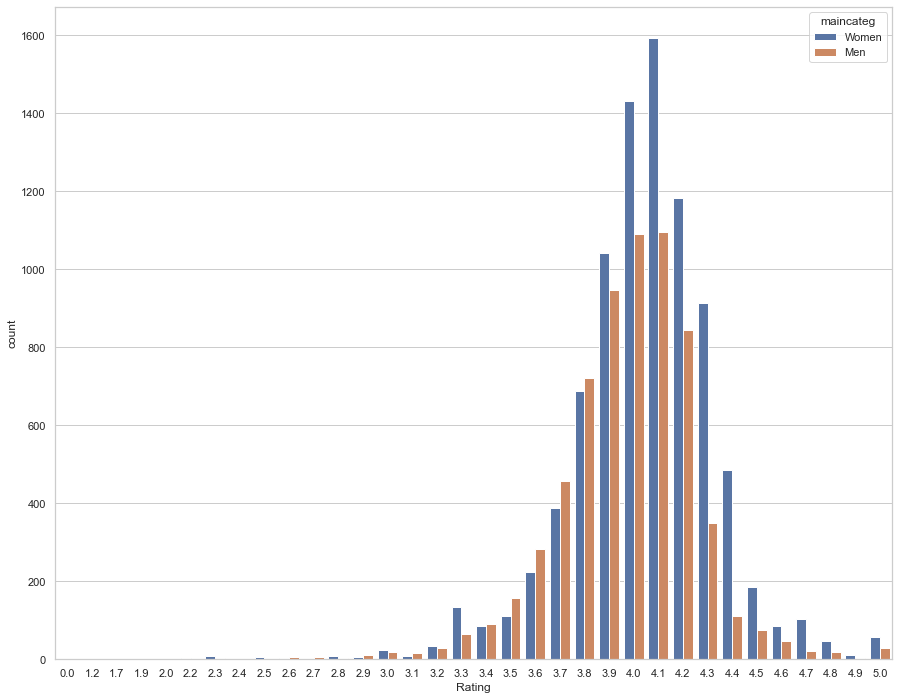

In [140]:
plt.figure(figsize=(15,12))
# sns.set_theme(style="whitegrid")
sns.countplot(data=df1,x='Rating',hue='maincateg')

<AxesSubplot:xlabel='Rating', ylabel='count'>

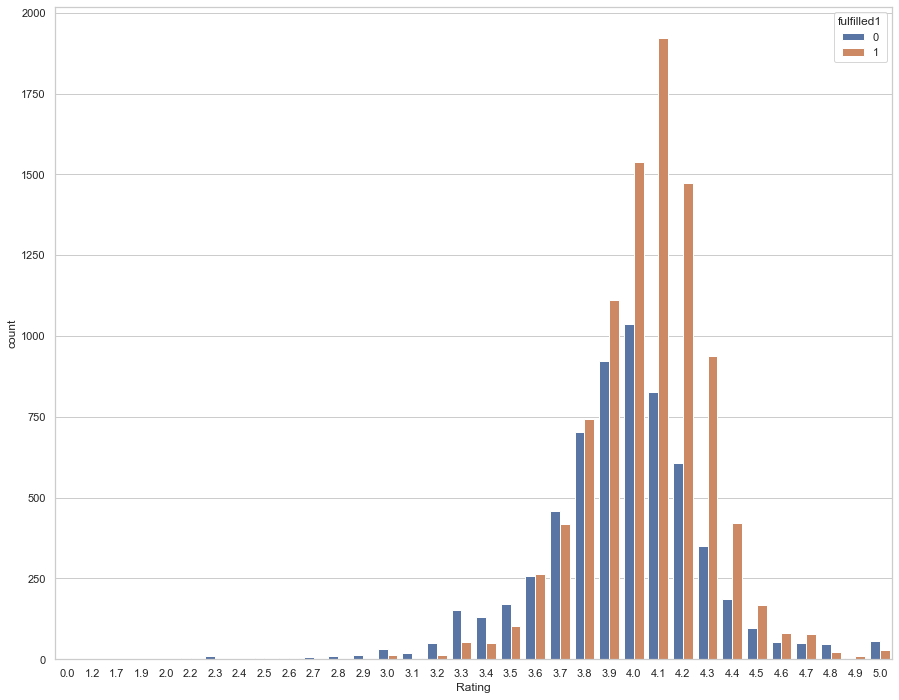

In [141]:
plt.figure(figsize=(15,12))
# sns.set_theme(style="whitegrid")
sns.countplot(data=df,x='Rating',hue='fulfilled1')

<AxesSubplot:xlabel='actprice1', ylabel='price1'>

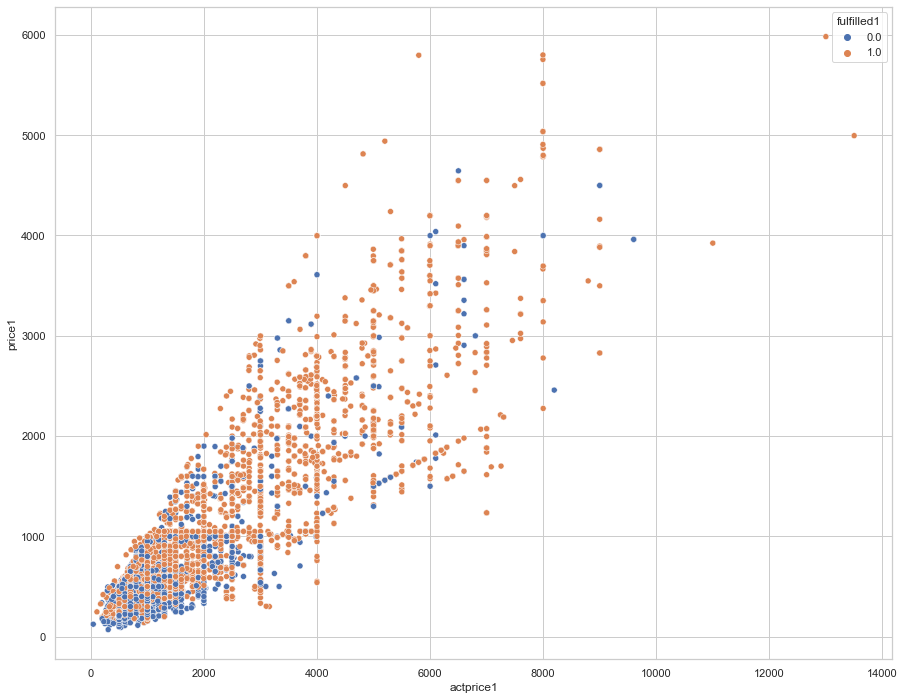

In [142]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df1,x='actprice1',y='price1',hue='fulfilled1')

In [143]:
df[df['actprice1']<df['price1']]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,iswomen
725,464,"Women Black, Green Sports Sandal",3.8,Women,Flipkart,863,738,6.96%,418.0,66.0,146.0,151.0,35.0,17,61,1,Women
901,199,DRAGON LADIES Running Shoes For Women (Navy),4.1,Women,Flipkart,1561,1541,11.77%,366.0,35.0,196.0,73.0,16.0,19,28,1,Women
1472,351,Women Brown Wedges Sandal,4.3,Women,Flipkart,508,472,15.63%,126.0,19.0,110.0,17.0,7.0,8,6,1,Women
1596,570,AB1-SX00172L Casuals For Women (Orange),4.3,Women,Flipkart,853,799,1.13%,19.0,2.0,8.0,6.0,2.0,1,1,0,Women
1946,100,Slippers,4.1,Men,Flipkart,329,328,5.73%,2842.0,378.0,2118.0,630.0,446.0,192,240,1,Men
2010,504,"Bowling, Motorsport, Riding, Running, Walking,...",4.0,Men,Flipkart,461,457,20.87%,40969.0,6923.0,12799.0,13733.0,5191.0,3026,5042,1,Men
2139,212,ZAPATOZ Women White Solid PU Medium-Top Sports...,4.7,Women,Amazon,525,431,0.00%,4.0,2.0,2.0,1.0,1.0,42,86,1,Women
2387,486,Women Brown Wedges Sandal,4.4,Women,Flipkart,554,418,4.81%,129.0,20.0,56.0,43.0,11.0,4,3,1,Women
2498,141,Slip On Sneakers For Men (Blue),3.8,Men,Flipkart,370,302,42.08%,741.0,81.0,73.0,67.0,57.0,98,216,0,Men
4145,713,Women Red Heels Sandal,3.7,Women,Flipkart,564,538,19.31%,125.0,20.0,20.0,26.0,33.0,8,21,0,Women


In [144]:
df1[['price1','actprice1']] = df1[['actprice1','price1']].where(df1['actprice1']<df1['price1'], df1[['price1','actprice1']].values)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\873310573.py:1: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df1[['price1','actprice1']] = df1[['actprice1','price1']].where(df1['actprice1']<df1['price1'], df1[['price1','actprice1']].values)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\873310573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['price1','actprice1']] = df1[['actprice1','price1']].where(df1['actprice1']<df1['price1'], df1[['price1','actprice1']].values)


In [145]:
df1['positive_feedback']=df1['star_5f']+df1['star_4f']
df1['negative_feedback']=df1['star_3f']+df1['star_2f']+df1['star_1f']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\272329121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['positive_feedback']=df1['star_5f']+df1['star_4f']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\272329121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['negative_feedback']=df1['star_3f']+df1['star_2f']+df1['star_1f']


In [146]:
# df1['good_prod']=df1['positive_feedback']/(df1['positive_feedback']+df1['negative_feedback'])*100

In [147]:
df2=df1.drop(columns=['id','iswomen','review%'])

In [148]:
df2[df2['negative_feedback']==0]

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,positive_feedback,negative_feedback
171,Jutis For Men (Brown),5.0,Men,Flipkart,449.0,749,40.05,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
222,Slippers,4.7,Women,Flipkart,599.0,1199,50.04,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
265,SL-172 Women Walking Shoes For Women (Pink),4.5,Women,Flipkart,798.0,799,0.13,6.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,6.0,0.0
294,WMNS NIKE ZOOM WINFLO 7 Training & Gym Shoes F...,4.7,Women,Flipkart,4785.0,7995,40.15,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
301,D'LITES-RUNWAY READY Sneakers For Women (White),4.8,Women,Flipkart,3574.0,6499,45.01,10.0,0.0,8.0,2.0,0.0,0.0,0.0,1.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15552,"Women Black, Silver, Gold Sports Sandal",4.8,Women,Flipkart,569.0,1299,56.20,4.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
15591,Ethnic Mule For Women (Multicolor),4.7,Women,Flipkart,219.0,1299,83.14,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0
15632,WMNS NIKE REVOLUTION 5 Running Shoes For Women...,4.7,Women,Flipkart,2217.0,3695,40.00,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
15724,Mojaris For Men (Brown),5.0,Men,Flipkart,649.0,2199,70.49,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [149]:
df2.isna().sum()

title                0
Rating               0
maincateg            0
platform             0
price1               0
actprice1            0
Offer %              0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
positive_feedback    0
negative_feedback    0
dtype: int64

In [150]:
# df2.drop(df2[df2['negative_feedback']==0].index, inplace = True)

In [151]:
df3=df2

In [152]:
df3

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,positive_feedback,negative_feedback
0,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698.0,999,30.13,38.000000,7.0,17.000000,9.00000,6.0,3.0,3.0,0.0,26.000000,12.0
1,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999.0,1999,50.03,531.000000,69.0,264.000000,92.00000,73.0,29.0,73.0,1.0,356.000000,175.0
2,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749.0,4999,45.01,17.000000,4.0,11.000000,3.00000,2.0,1.0,0.0,1.0,14.000000,3.0
3,Men Black Sports Sandal,4.2,Men,Flipkart,518.0,724,15.85,46413.000000,6229.0,1045.000000,12416.00000,5352.0,701.0,4595.0,1.0,13461.000000,10648.0
4,Men Green Sports Sandal,3.9,Men,Flipkart,1379.0,2299,40.02,77.000000,3.0,35.000000,21.00000,7.0,7.0,7.0,1.0,56.000000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,Women Maroon Heels Sandal,4.3,Women,Flipkart,567.0,1199,52.71,807.000000,114.0,485.000000,177.00000,61.0,41.0,43.0,0.0,662.000000,145.0
15726,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499.0,998,50.00,246.000000,34.0,120.000000,45.00000,37.0,16.0,28.0,1.0,165.000000,81.0
15727,Women Navy Flats Sandal,3.7,Women,Flipkart,329.0,499,34.07,202.673581,18.0,130.688779,37.46565,20.0,10.0,15.0,1.0,168.154429,45.0
15728,Red Chief Men's Sneakers,3.9,Men,Amazon,2249.0,4499,50.01,750.000000,479.0,13.000000,6.00000,10.0,25.0,47.0,1.0,19.000000,82.0


## Lets extract features from title column

In [153]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


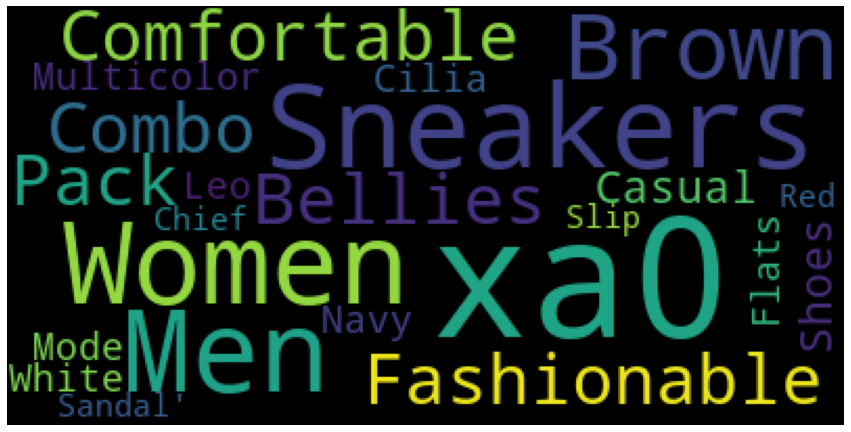

In [154]:
from wordcloud import WordCloud, STOPWORDS
text = df['title'].values 

wordclouds = WordCloud().generate(str(text))
plt.figure(figsize = (15, 15))
plt.imshow(wordclouds)
plt.axis("off")
plt.show()

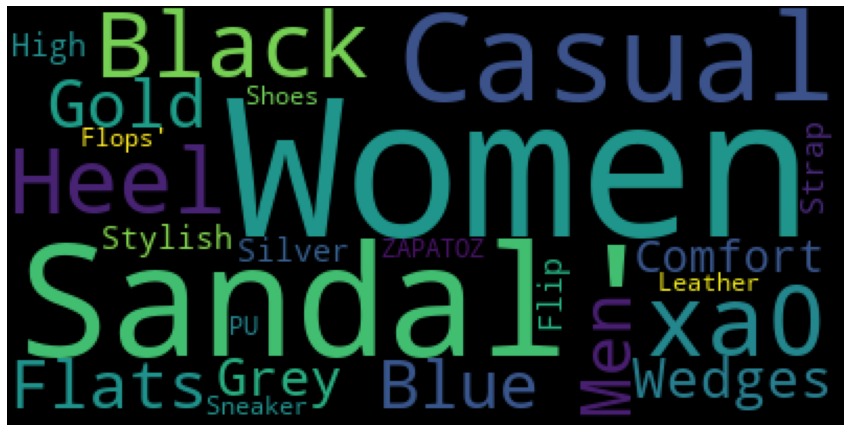

In [155]:
text1 = test_df['title'].values 

wordclouds = WordCloud().generate(str(text1))
plt.figure(figsize = (15, 15))
plt.imshow(wordclouds)
plt.axis("off")
plt.show()

In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15364 entries, 0 to 15729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              15364 non-null  object 
 1   Rating             15364 non-null  float64
 2   maincateg          15364 non-null  object 
 3   platform           15364 non-null  object 
 4   price1             15364 non-null  float64
 5   actprice1          15364 non-null  int64  
 6   Offer %            15364 non-null  float64
 7   norating1          15364 non-null  float64
 8   noreviews1         15364 non-null  float64
 9   star_5f            15364 non-null  float64
 10  star_4f            15364 non-null  float64
 11  star_3f            15364 non-null  float64
 12  star_2f            15364 non-null  float64
 13  star_1f            15364 non-null  float64
 14  fulfilled1         15364 non-null  float64
 15  positive_feedback  15364 non-null  float64
 16  negative_feedback  153

In [157]:
arr=['Casual','Sneaker','Sandal','Flats','Comfort','Shoes','Black','Brown','White','Navy','Multicolor','Blue','Grey','Gold','Silver','Red','Slip','Flip','Heel','Wedges','Flops','Bellies','Leather','Combo','Fashion','Stylish','Pack']

In [158]:
arr

['Casual',
 'Sneaker',
 'Sandal',
 'Flats',
 'Comfort',
 'Shoes',
 'Black',
 'Brown',
 'White',
 'Navy',
 'Multicolor',
 'Blue',
 'Grey',
 'Gold',
 'Silver',
 'Red',
 'Slip',
 'Flip',
 'Heel',
 'Wedges',
 'Flops',
 'Bellies',
 'Leather',
 'Combo',
 'Fashion',
 'Stylish',
 'Pack']

In [159]:
# df3

In [160]:
df5=df3

### Lets define a helper function `adder` to add those features

In [161]:
def adder(df5,arr):
    for col in arr:
        df5[col] = [ 1 if (col in x or col.lower() in x) else 0 for x in df5['title']]


In [162]:
adder(df5,arr)

In [163]:
df5

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,...,Flip,Heel,Wedges,Flops,Bellies,Leather,Combo,Fashion,Stylish,Pack
0,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698.0,999,30.13,38.000000,7.0,17.000000,...,0,0,0,0,1,0,0,1,0,0
1,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999.0,1999,50.03,531.000000,69.0,264.000000,...,0,0,0,0,0,0,1,0,0,1
2,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749.0,4999,45.01,17.000000,4.0,11.000000,...,0,0,0,0,0,0,0,0,0,0
3,Men Black Sports Sandal,4.2,Men,Flipkart,518.0,724,15.85,46413.000000,6229.0,1045.000000,...,0,0,0,0,0,0,0,0,0,0
4,Men Green Sports Sandal,3.9,Men,Flipkart,1379.0,2299,40.02,77.000000,3.0,35.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,Women Maroon Heels Sandal,4.3,Women,Flipkart,567.0,1199,52.71,807.000000,114.0,485.000000,...,0,1,0,0,0,0,0,0,0,0
15726,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499.0,998,50.00,246.000000,34.0,120.000000,...,0,0,0,0,0,0,0,0,0,0
15727,Women Navy Flats Sandal,3.7,Women,Flipkart,329.0,499,34.07,202.673581,18.0,130.688779,...,0,0,0,0,0,0,0,0,0,0
15728,Red Chief Men's Sneakers,3.9,Men,Amazon,2249.0,4499,50.01,750.000000,479.0,13.000000,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df5[arr].sum()

Casual        2145
Sneaker       1774
Sandal        4129
Flats         1033
Comfort        491
Shoes         3840
Black         4133
Brown         1188
White         1272
Navy           483
Multicolor     929
Blue          1253
Grey          1140
Gold           349
Silver         112
Red            767
Slip          1375
Flip           884
Heel          1107
Wedges         860
Flops          838
Bellies        972
Leather        479
Combo          457
Fashion        349
Stylish        909
Pack           492
dtype: int64

In [165]:
test_df_t=test_df

In [166]:
adder(test_df_t,arr)

In [167]:
test_df_t[arr].sum()

Casual         726
Sneaker        634
Sandal        1434
Flats          334
Comfort        181
Shoes         1315
Black         1348
Brown          410
White          417
Navy           166
Multicolor     324
Blue           413
Grey           412
Gold           122
Silver          40
Red            280
Slip           514
Flip           282
Heel           372
Wedges         315
Flops          272
Bellies        355
Leather        166
Combo          158
Fashion        112
Stylish        291
Pack           175
dtype: int64

In [168]:
df5.columns

Index(['title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1', 'positive_feedback',
       'negative_feedback', 'Casual', 'Sneaker', 'Sandal', 'Flats', 'Comfort',
       'Shoes', 'Black', 'Brown', 'White', 'Navy', 'Multicolor', 'Blue',
       'Grey', 'Gold', 'Silver', 'Red', 'Slip', 'Flip', 'Heel', 'Wedges',
       'Flops', 'Bellies', 'Leather', 'Combo', 'Fashion', 'Stylish', 'Pack'],
      dtype='object')

In [169]:
test_df_t.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'actprice1',
       'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f',
       'star_1f', 'fulfilled1', 'iswomen', 'Casual', 'Sneaker', 'Sandal',
       'Flats', 'Comfort', 'Shoes', 'Black', 'Brown', 'White', 'Navy',
       'Multicolor', 'Blue', 'Grey', 'Gold', 'Silver', 'Red', 'Slip', 'Flip',
       'Heel', 'Wedges', 'Flops', 'Bellies', 'Leather', 'Combo', 'Fashion',
       'Stylish', 'Pack'],
      dtype='object')

In [170]:
df5.isna().sum()

title                0
Rating               0
maincateg            0
platform             0
price1               0
actprice1            0
Offer %              0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
positive_feedback    0
negative_feedback    0
Casual               0
Sneaker              0
Sandal               0
Flats                0
Comfort              0
Shoes                0
Black                0
Brown                0
White                0
Navy                 0
Multicolor           0
Blue                 0
Grey                 0
Gold                 0
Silver               0
Red                  0
Slip                 0
Flip                 0
Heel                 0
Wedges               0
Flops                0
Bellies              0
Leather              0
Combo                0
Fashion              0
Stylish              0
Pack       

In [171]:
df5=df5.drop(columns=['title'])

### Correlation matrix

In [172]:
df5.corr()

,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,...,Flip,Heel,Wedges,Flops,Bellies,Leather,Combo,Fashion,Stylish,Pack
Rating,1.000000,0.292856,0.252275,-0.105269,0.017997,0.022612,0.027222,0.030713,0.001843,-0.023096,...,-0.083531,0.008640,-0.011200,-0.079965,-0.032478,0.012331,-0.091728,-0.009474,0.021644,-0.100510
price1,0.292856,1.000000,0.889693,-0.183455,-0.044613,-0.040584,-0.040246,-0.031729,-0.055853,-0.070818,...,-0.110644,-0.065044,-0.049910,-0.106649,-0.076833,0.005149,-0.039312,-0.059505,-0.091304,-0.052992
actprice1,0.252275,0.889693,1.000000,0.168608,-0.064653,-0.062728,-0.061487,-0.055902,-0.071147,-0.080577,...,-0.108326,-0.072786,-0.053911,-0.104711,-0.074018,0.041435,-0.004467,-0.047524,-0.080723,-0.023143
Offer %,-0.105269,-0.183455,0.168608,1.000000,-0.081705,-0.088622,-0.083982,-0.100377,-0.068016,-0.042622,...,0.026813,-0.011751,-0.027675,0.023625,0.050980,0.063742,0.067417,0.037938,0.062289,0.070132
norating1,0.017997,-0.044613,-0.064653,-0.081705,1.000000,0.995213,0.995882,0.983913,0.993477,0.968124,...,0.008823,-0.043990,-0.044280,0.010542,-0.054073,-0.005691,0.024313,-0.023104,0.006197,0.019447
noreviews1,0.022612,-0.040584,-0.062728,-0.088622,0.995213,1.000000,0.991152,0.988855,0.988630,0.949748,...,0.000373,-0.038895,-0.040236,0.002091,-0.050554,-0.005120,0.019850,-0.021747,0.006274,0.015215
star_5f,0.027222,-0.040246,-0.061487,-0.083982,0.995882,0.991152,1.000000,0.976178,0.984210,0.958015,...,0.006448,-0.044583,-0.044820,0.008088,-0.054299,-0.005145,0.021774,-0.023319,0.008974,0.016589
star_4f,0.030713,-0.031729,-0.055902,-0.100377,0.983913,0.988855,0.976178,1.000000,0.974173,0.922600,...,0.006640,-0.040124,-0.040243,0.008414,-0.048583,-0.009025,0.010377,-0.021654,-0.001501,0.006803
star_3f,0.001843,-0.055853,-0.071147,-0.068016,0.993477,0.988630,0.984210,0.974173,1.000000,0.977875,...,0.012711,-0.042288,-0.041947,0.014426,-0.052029,-0.004113,0.031473,-0.021746,0.005624,0.026925
star_2f,-0.023096,-0.070818,-0.080577,-0.042622,0.968124,0.949748,0.958015,0.922600,0.977875,1.000000,...,0.018971,-0.046738,-0.045195,0.020827,-0.056351,-0.003420,0.051796,-0.022912,0.013040,0.046694


In [173]:
df5.head(5)

,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,...,Flip,Heel,Wedges,Flops,Bellies,Leather,Combo,Fashion,Stylish,Pack
0,3.9,Women,Flipkart,698.0,999,30.13,38.0,7.0,17.0,9.0,...,0,0,0,0,1,0,0,1,0,0
1,3.8,Men,Flipkart,999.0,1999,50.03,531.0,69.0,264.0,92.0,...,0,0,0,0,0,0,1,0,0,1
2,4.4,Women,Flipkart,2749.0,4999,45.01,17.0,4.0,11.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,4.2,Men,Flipkart,518.0,724,15.85,46413.0,6229.0,1045.0,12416.0,...,0,0,0,0,0,0,0,0,0,0
4,3.9,Men,Flipkart,1379.0,2299,40.02,77.0,3.0,35.0,21.0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
test_df_t.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
iswomen       0
Casual        0
Sneaker       0
Sandal        0
Flats         0
Comfort       0
Shoes         0
Black         0
Brown         0
White         0
Navy          0
Multicolor    0
Blue          0
Grey          0
Gold          0
Silver        0
Red           0
Slip          0
Flip          0
Heel          0
Wedges        0
Flops         0
Bellies       0
Leather       0
Combo         0
Fashion       0
Stylish       0
Pack          0
dtype: int64

In [175]:
test_df1=test_df_t

In [176]:
test_df1.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
iswomen       0
Casual        0
Sneaker       0
Sandal        0
Flats         0
Comfort       0
Shoes         0
Black         0
Brown         0
White         0
Navy          0
Multicolor    0
Blue          0
Grey          0
Gold          0
Silver        0
Red           0
Slip          0
Flip          0
Heel          0
Wedges        0
Flops         0
Bellies       0
Leather       0
Combo         0
Fashion       0
Stylish       0
Pack          0
dtype: int64

In [177]:
test_df1.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
iswomen       0
Casual        0
Sneaker       0
Sandal        0
Flats         0
Comfort       0
Shoes         0
Black         0
Brown         0
White         0
Navy          0
Multicolor    0
Blue          0
Grey          0
Gold          0
Silver        0
Red           0
Slip          0
Flip          0
Heel          0
Wedges        0
Flops         0
Bellies       0
Leather       0
Combo         0
Fashion       0
Stylish       0
Pack          0
dtype: int64

In [178]:
test_df1['positive_feedback']=test_df1['star_5f']+test_df1['star_4f']
test_df1['negative_feedback']=test_df1['star_3f']+test_df1['star_2f']+test_df1['star_1f']
# test_df1['good_prod']=test_df1['positive_feedback']/(test_df1['positive_feedback']+test_df1['negative_feedback'])*100

In [179]:
test_id=test_df1['id']

In [181]:
test_df2=test_df1.drop(columns=['id','title','iswomen'])

In [182]:
test_df3=test_df2

In [ ]:
## 

In [183]:
df5=pd.get_dummies(df5)

In [184]:
df5

,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,...,Bellies,Leather,Combo,Fashion,Stylish,Pack,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,698.0,999,30.13,38.000000,7.0,17.000000,9.00000,6.0,3.0,...,1,0,0,1,0,0,0,1,0,1
1,3.8,999.0,1999,50.03,531.000000,69.0,264.000000,92.00000,73.0,29.0,...,0,0,1,0,0,1,1,0,0,1
2,4.4,2749.0,4999,45.01,17.000000,4.0,11.000000,3.00000,2.0,1.0,...,0,0,0,0,0,0,0,1,0,1
3,4.2,518.0,724,15.85,46413.000000,6229.0,1045.000000,12416.00000,5352.0,701.0,...,0,0,0,0,0,0,1,0,0,1
4,3.9,1379.0,2299,40.02,77.000000,3.0,35.000000,21.00000,7.0,7.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,4.3,567.0,1199,52.71,807.000000,114.0,485.000000,177.00000,61.0,41.0,...,0,0,0,0,0,0,0,1,0,1
15726,3.9,499.0,998,50.00,246.000000,34.0,120.000000,45.00000,37.0,16.0,...,0,0,0,0,0,0,0,1,0,1
15727,3.7,329.0,499,34.07,202.673581,18.0,130.688779,37.46565,20.0,10.0,...,0,0,0,0,0,0,0,1,0,1
15728,3.9,2249.0,4499,50.01,750.000000,479.0,13.000000,6.00000,10.0,25.0,...,0,0,0,0,0,0,1,0,1,0


In [185]:
test_df3=pd.get_dummies(test_df3)

In [186]:
test_df3

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,...,Combo,Fashion,Stylish,Pack,positive_feedback,negative_feedback,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.800000,999.0,27928.0,3543.0,14238.000000,4295.0,3457.0,1962.0,3976.00000,1,...,0,0,0,0,18533.000000,9395.00000,1,0,0,1
1,3.900000,499.0,3015.0,404.0,1458.000000,657.0,397.0,182.0,321.00000,1,...,0,0,0,0,2115.000000,900.00000,0,1,0,1
2,3.900000,999.0,449.0,52.0,229.000000,70.0,71.0,33.0,46.00000,1,...,0,0,0,0,299.000000,150.00000,0,1,0,1
3,3.900000,2999.0,290.0,40.0,141.000000,51.0,49.0,17.0,32.00000,1,...,0,0,0,0,192.000000,98.00000,1,0,0,1
4,3.900000,999.0,2423.0,326.0,1265.000000,414.0,293.0,143.0,308.00000,0,...,0,0,0,0,1679.000000,744.00000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,3.973326,699.0,1235.0,153.0,580.699059,323.0,155.0,62.0,109.17055,1,...,0,0,0,0,903.699059,326.17055,0,1,0,1
5240,3.900000,1993.0,329.0,56.0,350.000000,37.0,60.0,5.0,37.00000,0,...,0,0,0,0,387.000000,102.00000,1,0,0,1
5241,3.800000,999.0,1280.0,135.0,574.000000,290.0,172.0,94.0,150.00000,0,...,0,0,0,0,864.000000,416.00000,0,1,0,1
5242,3.900000,499.0,4867.0,574.0,2384.000000,974.0,648.0,328.0,533.00000,0,...,0,0,1,0,3358.000000,1509.00000,0,1,0,1


In [187]:
df5.columns

Index(['Rating', 'price1', 'actprice1', 'Offer %', 'norating1', 'noreviews1',
       'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'positive_feedback', 'negative_feedback', 'Casual', 'Sneaker', 'Sandal',
       'Flats', 'Comfort', 'Shoes', 'Black', 'Brown', 'White', 'Navy',
       'Multicolor', 'Blue', 'Grey', 'Gold', 'Silver', 'Red', 'Slip', 'Flip',
       'Heel', 'Wedges', 'Flops', 'Bellies', 'Leather', 'Combo', 'Fashion',
       'Stylish', 'Pack', 'maincateg_Men', 'maincateg_Women',
       'platform_Amazon', 'platform_Flipkart'],
      dtype='object')

In [188]:
input_cols=['Rating', 'actprice1','norating1', 'noreviews1',
       'fulfilled1','star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'positive_feedback', 'negative_feedback', 
            'Casual', 'Sneaker', 'Sandal', 'Flats', 'Comfort', 'Shoes',
       'Black', 'Brown', 'White', 'Navy', 'Multicolor', 'Blue', 'Grey', 'Gold',
       'Silver', 'Red', 'Slip', 'Flip', 'Heel', 'Wedges', 'Flops', 'Bellies',
       'Leather', 'Combo', 'Fashion', 'Stylish', 'Pack', 'maincateg_Men',
       'maincateg_Women', 'platform_Amazon', 'platform_Flipkart']

In [189]:
target_col1='Offer %'

In [190]:
target_col2='price1'

## Scaling

In [191]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [192]:
scaler1 = MinMaxScaler()
df5[input_cols]=scaler1.fit_transform(df5[input_cols])
test_df3[input_cols]=scaler1.transform((test_df3[input_cols]))

In [193]:
X_scaled1=df5[input_cols]
X_test_scaled1=test_df3[input_cols]

In [194]:
X_scaled1

,Rating,actprice1,norating1,noreviews1,fulfilled1,star_5f,star_4f,star_3f,star_2f,star_1f,...,Bellies,Leather,Combo,Fashion,Stylish,Pack,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,0.78,0.065490,0.000127,0.000789,0.0,0.000335,0.001287,0.000575,0.000519,0.000166,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.76,0.140251,0.001823,0.002152,1.0,0.001968,0.002407,0.002490,0.002740,0.004042,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.88,0.364533,0.000055,0.000723,1.0,0.000295,0.001206,0.000461,0.000348,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.84,0.044931,0.159597,0.137605,1.0,0.007133,0.168670,0.153352,0.060136,0.254430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.78,0.162679,0.000261,0.000701,1.0,0.000454,0.001449,0.000604,0.000860,0.000388,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,0.86,0.080443,0.002772,0.003141,0.0,0.003430,0.003553,0.002147,0.003764,0.002381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15726,0.78,0.065416,0.000842,0.001382,1.0,0.001016,0.001773,0.001461,0.001629,0.001550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15727,0.74,0.028110,0.000693,0.001030,1.0,0.001087,0.001671,0.000975,0.001117,0.000831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15728,0.78,0.327153,0.002576,0.011167,1.0,0.000308,0.001246,0.000689,0.002398,0.002602,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [195]:
y1=df5['Offer %']
y2=df5['price1']

## Train Test split

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train1, X_val1, y_train1, y_val1 = train_test_split( X_scaled1,y1, test_size=0.33, random_state=42)#for offer %

In [198]:
# for price 
X_train2, X_val2, y_train2, y_val2 = train_test_split( X_scaled1,y2, test_size=0.33, random_state=42)

## Training with different models

In [206]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.metrics import mean_squared_error
# !pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [216]:
from sklearn.metrics import r2_score

In [217]:
modeld=DecisionTreeRegressor()

In [218]:
modelr=RandomForestRegressor()

In [219]:
modelxgb = XGBRegressor()

In [220]:
modelxgbrf=XGBRFRegressor()

In [221]:
modelcat=CatBoostRegressor()

In [222]:
modellg=LGBMRegressor()

### Lets define a helper function to evaluate a model

In [223]:
# general model helper function 
def train_and_evaluate(model,X_train,y_train, X_val,y_val, **params):
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    return model, train_rmse, val_rmse,r2score

In [224]:
train_and_evaluate(modeld,X_train2,y_train2, X_val2,y_val2)

(DecisionTreeRegressor(),
 4.89723359019791,
 262.2152761236741,
 0.8400360565482072)

In [225]:
train_and_evaluate(modelr,X_train2,y_train2, X_val2,y_val2)

(RandomForestRegressor(),
 73.3037410972866,
 201.5312354650894,
 0.9055089101605849)

In [226]:
train_and_evaluate(modelxgb,X_train2,y_train2, X_val2,y_val2)

(XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...),
 95.4017569640017,
 215.7972452567686,
 0.8916577335903377)

In [227]:
train_and_evaluate(modelcat,X_train2,y_train2, X_val2,y_val2)

Learning rate set to 0.059178
0:	learn: 614.8068077	total: 144ms	remaining: 2m 24s
1:	learn: 588.8209589	total: 155ms	remaining: 1m 17s
2:	learn: 564.4489832	total: 164ms	remaining: 54.4s
3:	learn: 542.1088285	total: 173ms	remaining: 43.2s
4:	learn: 520.9084956	total: 182ms	remaining: 36.3s
5:	learn: 501.4780902	total: 193ms	remaining: 31.9s
6:	learn: 482.9168937	total: 202ms	remaining: 28.7s
7:	learn: 465.3609500	total: 212ms	remaining: 26.3s
8:	learn: 449.9148829	total: 221ms	remaining: 24.3s
9:	learn: 434.6692596	total: 245ms	remaining: 24.3s
10:	learn: 421.4764041	total: 254ms	remaining: 22.8s
11:	learn: 408.5577939	total: 262ms	remaining: 21.6s
12:	learn: 396.3075184	total: 270ms	remaining: 20.5s
13:	learn: 386.0292962	total: 278ms	remaining: 19.6s
14:	learn: 375.7396296	total: 287ms	remaining: 18.8s
15:	learn: 366.3555707	total: 295ms	remaining: 18.1s
16:	learn: 357.5271500	total: 303ms	remaining: 17.5s
17:	learn: 349.4490824	total: 312ms	remaining: 17s
18:	learn: 341.5765867	tot

161:	learn: 222.2539806	total: 1.47s	remaining: 7.61s
162:	learn: 221.9746936	total: 1.48s	remaining: 7.6s
163:	learn: 221.6241577	total: 1.49s	remaining: 7.58s
164:	learn: 221.5279068	total: 1.5s	remaining: 7.57s
165:	learn: 221.2172859	total: 1.5s	remaining: 7.55s
166:	learn: 221.0773132	total: 1.51s	remaining: 7.54s
167:	learn: 220.9298056	total: 1.52s	remaining: 7.52s
168:	learn: 220.6519479	total: 1.52s	remaining: 7.5s
169:	learn: 220.4358404	total: 1.53s	remaining: 7.49s
170:	learn: 220.2951430	total: 1.54s	remaining: 7.47s
171:	learn: 220.1596513	total: 1.55s	remaining: 7.46s
172:	learn: 219.9921585	total: 1.56s	remaining: 7.44s
173:	learn: 219.7848494	total: 1.56s	remaining: 7.42s
174:	learn: 219.5506906	total: 1.57s	remaining: 7.41s
175:	learn: 219.3940372	total: 1.58s	remaining: 7.39s
176:	learn: 219.2761905	total: 1.59s	remaining: 7.38s
177:	learn: 219.0107894	total: 1.59s	remaining: 7.36s
178:	learn: 218.8192411	total: 1.6s	remaining: 7.35s
179:	learn: 218.6484598	total: 1.

337:	learn: 191.0813363	total: 2.73s	remaining: 5.34s
338:	learn: 190.8021417	total: 2.73s	remaining: 5.33s
339:	learn: 190.6958395	total: 2.74s	remaining: 5.32s
340:	learn: 190.5904731	total: 2.75s	remaining: 5.31s
341:	learn: 190.4929663	total: 2.75s	remaining: 5.3s
342:	learn: 190.3725761	total: 2.76s	remaining: 5.29s
343:	learn: 190.2946401	total: 2.77s	remaining: 5.28s
344:	learn: 190.1766795	total: 2.77s	remaining: 5.26s
345:	learn: 190.0488165	total: 2.78s	remaining: 5.25s
346:	learn: 189.9084231	total: 2.79s	remaining: 5.24s
347:	learn: 189.7982709	total: 2.79s	remaining: 5.23s
348:	learn: 189.6883627	total: 2.8s	remaining: 5.22s
349:	learn: 189.5820287	total: 2.81s	remaining: 5.21s
350:	learn: 189.4551516	total: 2.81s	remaining: 5.2s
351:	learn: 189.2603260	total: 2.82s	remaining: 5.19s
352:	learn: 189.2027558	total: 2.83s	remaining: 5.18s
353:	learn: 189.0056416	total: 2.83s	remaining: 5.17s
354:	learn: 188.8517099	total: 2.84s	remaining: 5.16s
355:	learn: 188.7816090	total: 

498:	learn: 173.0777002	total: 3.81s	remaining: 3.82s
499:	learn: 173.0379091	total: 3.81s	remaining: 3.81s
500:	learn: 172.9639371	total: 3.82s	remaining: 3.8s
501:	learn: 172.8567435	total: 3.83s	remaining: 3.79s
502:	learn: 172.7937451	total: 3.83s	remaining: 3.79s
503:	learn: 172.7411115	total: 3.84s	remaining: 3.78s
504:	learn: 172.6470156	total: 3.85s	remaining: 3.77s
505:	learn: 172.5161993	total: 3.86s	remaining: 3.76s
506:	learn: 172.4726797	total: 3.86s	remaining: 3.76s
507:	learn: 172.3393050	total: 3.87s	remaining: 3.75s
508:	learn: 172.2561311	total: 3.88s	remaining: 3.74s
509:	learn: 172.1306105	total: 3.89s	remaining: 3.73s
510:	learn: 172.0727442	total: 3.89s	remaining: 3.73s
511:	learn: 171.9876687	total: 3.9s	remaining: 3.72s
512:	learn: 171.8685053	total: 3.91s	remaining: 3.71s
513:	learn: 171.7941176	total: 3.92s	remaining: 3.7s
514:	learn: 171.6906433	total: 3.92s	remaining: 3.7s
515:	learn: 171.6153769	total: 3.93s	remaining: 3.69s
516:	learn: 171.5474256	total: 3

651:	learn: 160.3560945	total: 4.88s	remaining: 2.6s
652:	learn: 160.2590572	total: 4.89s	remaining: 2.6s
653:	learn: 160.1717517	total: 4.89s	remaining: 2.59s
654:	learn: 160.0702444	total: 4.9s	remaining: 2.58s
655:	learn: 159.9991463	total: 4.91s	remaining: 2.57s
656:	learn: 159.9346317	total: 4.92s	remaining: 2.57s
657:	learn: 159.8660735	total: 4.92s	remaining: 2.56s
658:	learn: 159.7543543	total: 4.93s	remaining: 2.55s
659:	learn: 159.6932199	total: 4.94s	remaining: 2.54s
660:	learn: 159.6351293	total: 4.95s	remaining: 2.54s
661:	learn: 159.5236523	total: 4.96s	remaining: 2.53s
662:	learn: 159.4847391	total: 4.96s	remaining: 2.52s
663:	learn: 159.4315071	total: 4.97s	remaining: 2.51s
664:	learn: 159.3349306	total: 4.98s	remaining: 2.51s
665:	learn: 159.2731769	total: 4.99s	remaining: 2.5s
666:	learn: 159.1918713	total: 4.99s	remaining: 2.49s
667:	learn: 159.1226142	total: 5s	remaining: 2.48s
668:	learn: 159.0490820	total: 5.01s	remaining: 2.48s
669:	learn: 158.9459793	total: 5.01

827:	learn: 147.5800014	total: 6.13s	remaining: 1.27s
828:	learn: 147.5408051	total: 6.14s	remaining: 1.27s
829:	learn: 147.4736395	total: 6.15s	remaining: 1.26s
830:	learn: 147.4025341	total: 6.16s	remaining: 1.25s
831:	learn: 147.3432759	total: 6.16s	remaining: 1.24s
832:	learn: 147.2683257	total: 6.17s	remaining: 1.24s
833:	learn: 147.1445840	total: 6.18s	remaining: 1.23s
834:	learn: 147.0939571	total: 6.18s	remaining: 1.22s
835:	learn: 147.0020790	total: 6.19s	remaining: 1.21s
836:	learn: 146.9474942	total: 6.2s	remaining: 1.21s
837:	learn: 146.8681713	total: 6.21s	remaining: 1.2s
838:	learn: 146.8143257	total: 6.21s	remaining: 1.19s
839:	learn: 146.7131082	total: 6.22s	remaining: 1.18s
840:	learn: 146.6491338	total: 6.23s	remaining: 1.18s
841:	learn: 146.5300601	total: 6.23s	remaining: 1.17s
842:	learn: 146.4020810	total: 6.24s	remaining: 1.16s
843:	learn: 146.3810141	total: 6.25s	remaining: 1.15s
844:	learn: 146.3271708	total: 6.25s	remaining: 1.15s
845:	learn: 146.2281043	total:

(<catboost.core.CatBoostRegressor at 0x1788e4a6d00>,
 136.58568821949086,
 215.24046261966689,
 0.892216084299046)

In [229]:
train_and_evaluate(modellg,X_train2,y_train2, X_val2,y_val2)

(LGBMRegressor(), 163.37482612573362, 222.3330642245406, 0.8849956598381394)

In [230]:
train_and_evaluate(modelxgbrf,X_train2,y_train2, X_val2,y_val2)

(XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='reg:squarederror', predictor='auto', random_state=0,
                reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...),
 227.84857700463292,
 258.4077906748747,
 0.8446478280560122)

### Random_Forest 

#### Helper funtion to evaluate random forest with different parameters

In [231]:
def train_and_evaluaterf(X_train,y_train, X_val,y_val, **params):
    model=RandomForestRegressor(n_jobs=-1,random_state=42,**params)
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    print(r2score)
    print(train_rmse)
    print(val_rmse)

In [232]:
train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=50)

0.9052278650315037
75.26211156497635
201.83072041670974


In [233]:
for i in range(1,20):
    train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=50*i)
    print(i)

0.9052278650315037
75.26211156497635
201.83072041670974
1
0.9067035050166133
73.58597506640065
200.25326346281693
2
0.9070552048427329
73.10340075123601
199.87545968013134
3
0.9072711601783601
72.81334632555532
199.64312136659566
4
0.9074043983791206
72.58501383758876
199.49964037218714
5
0.9075384073512273
72.39627300192363
199.35522518808244
6
0.9073675993379959
72.22925153232494
199.53927868161256
7
0.9075629992076
72.06358157919647
199.32871233584663
8
0.9077237332211346
71.95653461254177
199.1553356387431
9
0.9078107972906663
71.82243866257573
199.06136041362154
10
0.9079090578507999
71.67935587430242
198.95524660098698
11
0.9080036052138175
71.70054382843152
198.85308929823006
12
0.908158978835785
71.68122296504274
198.68509586117736
13
0.9082480226399173
71.59951828441523
198.58875564835506
14
0.9082249206793869
71.50924297651827
198.61375511417918
15
0.9082650511251069
71.49261335717287
198.57032649456863
16
0.9082479845055945
71.57765750697321
198.58879691747612
17
0.908273790

In [234]:
for i in range(20,30):
    train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=300,max_depth=i)
    print(i)

0.9065113831198273
78.24800792831356
200.4593443594011
20
0.907366132690614
76.49614652173611
199.54085832653266
21
0.9072154094630308
75.39373609332822
199.70312737125752
22
0.9074706131667315
74.40838869533839
199.4282968715013
23
0.9074417414526602
73.7617782162632
199.4594080021444
24
0.9076834153560075
73.47967117242021
199.1988389216452
25
0.9078897650470609
73.00975520448225
198.97608580310145
26
0.9075722938323679
72.78757941415992
199.3186907419751
27
0.9077516678745173
72.67017342537571
199.1251883615865
28
0.907973805258589
72.56123684099714
198.88529345889037
29


In [235]:
for i in range(20,40):
    train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=300,max_depth=21,max_features=i)
    print(i)

0.9055782794872183
74.97072589996847
201.45724619854823
20
0.9063081548039703
74.86863819423296
200.67710829913983
21
0.9067466331332407
74.57693427077244
200.20697263250915
22
0.9070645330776945
75.03330302006688
199.86542936035087
23
0.9069982039031955
75.04006983506443
199.93673983426737
24
0.9064112187023613
75.26703061415257
200.56670244658068
25
0.9065697345518327
75.39019889447444
200.39677569616103
26
0.9066681593098028
75.52276615858761
200.2911931989569
27
0.9075855769592085
74.85250732181531
199.30436781495106
28
0.9071651569111585
75.41295121775742
199.7572001070784
29
0.9068251347575225
75.54109929146769
200.1226867667137
30
0.9070801185247157
75.40351966136531
199.84866975945667
31
0.9073319878417038
75.43032681116948
199.57763032433184
32
0.9076727368712095
75.94473939475047
199.21035949658872
33
0.9064158352426734
75.86749208706559
200.56175561602558
34
0.9076996047494322
75.78846029396317
199.1813715847388
35
0.9071198050040219
75.74993152136535
199.8059870901306
36
0.

In [236]:
train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=300,max_depth=28,max_features=23)

0.9068247294526178
71.52765723147702
200.12312202689924


## KFold cross validation

In [237]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True)
modelrffinal=RandomForestRegressor(n_jobs=-1,random_state=42,n_estimators=300,max_depth=28,max_features=11)

### Helper function for evaluation of KFold

In [238]:
# general function for kfold validation
def train_and_evaluateforkfold(model,X_train,y_train, X_val,y_val, **params):
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    return model, train_rmse, val_rmse,r2score

In [239]:
modelsrf = []
for train_idxs, val_idxs in kfold.split(X_scaled1):
    X_train, y_train = X_scaled1.iloc[train_idxs], y2.iloc[train_idxs]
    X_val, y_val = X_scaled1.iloc[val_idxs], y2.iloc[val_idxs]
    model,train_rmse, val_rmse,r2score = train_and_evaluateforkfold(modelrffinal,X_train, 
                                                     y_train, 
                                                     X_val, 
                                                     y_val
                                                     )
    modelsrf.append(model)
    print('Train RMSE: {}, Validation RMSE: {} R2_score {} '.format(train_rmse, val_rmse,r2score))

Train RMSE: 68.3739645165326, Validation RMSE: 178.57765833030078 R2_score 0.9252460400629093 
Train RMSE: 69.39059729449892, Validation RMSE: 176.12414041386089 R2_score 0.9258225763999566 
Train RMSE: 68.71084619531354, Validation RMSE: 190.27281389332018 R2_score 0.9166243404138655 
Train RMSE: 68.83750700729586, Validation RMSE: 199.9465349299311 R2_score 0.9109340308931327 
Train RMSE: 69.47985588087718, Validation RMSE: 165.8485009323494 R2_score 0.930741046006319 
Train RMSE: 68.99891717256816, Validation RMSE: 183.0160084839692 R2_score 0.915592645911729 
Train RMSE: 68.18720526210542, Validation RMSE: 195.63295198901645 R2_score 0.9167676337697622 
Train RMSE: 68.88838722958126, Validation RMSE: 183.16707992006386 R2_score 0.9174792976869541 
Train RMSE: 68.96912573049418, Validation RMSE: 148.79013663811386 R2_score 0.9330085997875273 
Train RMSE: 69.58374372693136, Validation RMSE: 198.79375503249486 R2_score 0.9153887452994807 


#### helper function to give average of predictions of all models

In [240]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [241]:
rfpredskfoldoffer=predict_avg(modelsrf,X_test_scaled1)

In [242]:
def csv_generatoroffer(preds,test_df,submission_df,csvname):
    test_df_final=test_df
    test_df_final['Offer %']=preds
    test_df_final=test_df_final[['id','actprice1','Offer %']]
    test_df_final['price1']=test_df_final['actprice1']-(test_df_final['actprice1']*test_df_final['Offer %'])/100
    test_df_final=test_df_final[['id','price1']]
    sample_true =submission_df
    sample_true['id']=test_df_final['id']
    sample_true['price1']=test_df_final['price1']
    submission_df=pd.read_csv('sample__submission.csv')
    merge_df1=submission_df.merge(sample_true,on="id")
    submission_df['price1']=merge_df1['price1_y']
    submission_df.to_csv(csvname,index=False)

In [243]:
csv_generatoroffer(rfpredskfoldoffer,test_df,submission_df,'rfpredskfoldoffernew.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16060\712915498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_final['price1']=test_df_final['actprice1']-(test_df_final['actprice1']*test_df_final['Offer %'])/100


In [244]:
# test_df_final

### Helper function to generate csv file of submission

In [245]:
def csv_generatorprice(preds,test_df,submission_df,csvname):
    test_df_final=test_df
    test_df_final['price1']=preds
    test_df_final=test_df_final[['id','actprice1','price1']]
#     test_df_final['price1']=test_df_final['actprice1']-(test_df_final['actprice1']*test_df_final['Offer %'])/100
    test_df_final=test_df_final[['id','price1']]
    sample_true =submission_df
    sample_true['id']=test_df_final['id']
    sample_true['price1']=test_df_final['price1']
    submission_df=pd.read_csv('sample__submission.csv')
    merge_df1=submission_df.merge(sample_true,on="id")
    submission_df['price1']=merge_df1['price1_y']
    submission_df.to_csv(csvname,index=False)

In [246]:
csv_generatorprice(rfpredskfoldoffer,test_df,submission_df,'rfpredskfoldpricenew.csv')

## score 193......

## XGBRegressor

In [247]:
def train_and_evaluatexgb(X_train,y_train, X_val,y_val, **params):
    model=XGBRegressor(n_jobs=-1,random_state=42,**params)
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    print(r2score)
    print(train_rmse)
    print(val_rmse)

In [248]:
for i in range(1,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=50*i)
    print(i)

0.8850137687328166
130.41194766478267
222.3155589523725
1
0.8916577335903377
95.4017569640017
215.7972452567686
2
0.89468316341419
72.22413183997553
212.76287055061837
3
0.8968232981358589
57.192913154258555
210.5900069055091
4
0.8977842990666922
45.125636492421535
209.6069814831562
5
0.8986621416458086
36.30272089228034
208.7049737894974
6
0.8989599977180696
30.322853283881365
208.3980312965999
7
0.89931158118294
25.760859392211255
208.03513962396335
8
0.899472191154713
21.711990192119305
207.86915304295755
9
0.8995392763457409
18.86184455895205
207.79978283959835
10
0.899599790782457
16.191623314088762
207.73718732663468
11
0.8996705557689988
14.207512755909496
207.6639648172813
12
0.8996256548247015
12.525988973814528
207.71042807232556
13
0.8996677391338539
11.308695008944303
207.66687976174745
14
0.8996900693333275
10.126407158891656
207.64376904512991
15
0.8997077326285824
9.168619378517906
207.62548653487443
16
0.8997182516542365
8.445162208131945
207.61459798311205
17
0.8997059

In [249]:
for i in range(1,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=i)
    print(i)

0.8230203937846894
257.7803404525023
275.8090741941132
1
0.8726351287071292
181.00429713429284
233.97624604073977
2
0.8878746383581189
115.36746676891491
219.53252201722682
3
0.9001957297455705
67.60573380471243
207.11974370695083
4
0.9046539596198584
33.469934637919096
202.44090458635029
5
0.8996705557689988
14.207512755909496
207.6639648172813
6
0.9022505297135462
7.157082714407434
204.97653366534726
7
0.9007759906346191
5.08092980398191
206.51677009501867
8
0.9010495975348782
4.909012920217963
206.23184198268123
9
0.9035197704818606
4.897757916565649
203.64141320163725
10
0.8983356607376694
4.897243074221749
209.0408966044472
11
0.9011904688057241
4.897234591216945
206.08498816313553
12
0.8995194774277255
4.897234437165616
207.8202585440628
13
0.8955680406558155
4.897234320489999
211.86716308520127
14
0.8959053295388469
4.897234414617749
211.5247476388142
15
0.8977318123472074
4.8972340425826335
209.66079009964605
16
0.8951985522886853
4.897234113266025
212.24163337429815
17
0.89681

In [250]:
for i in range(1,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=5,learning_rate=0.01*i)
    print(i)

0.860632679136134
199.79045219292917
244.7526563437034
1
0.8712734931577752
180.25139346333404
235.2236205876913
2
0.8809774768668414
162.30838743722694
226.18380956804768
3
0.8861143661036458
147.02533479220676
221.24904764971416
4
0.8880565535435145
135.80585327127363
219.35436200756487
5
0.8902014367624853
125.51934380248778
217.242737558831
6
0.8923275008460791
112.80121594846621
215.12918650961987
7
0.8967111761901312
107.47568598397433
210.70439973677068
8
0.8976770694209972
97.78946609454086
209.71689703720637
9
0.8987026862710468
90.50372880788876
208.66321885388462
10
0.8982979732721303
84.99541723118811
209.07963925332345
11
0.9008785133124645
81.69928347062267
206.41005134627358
12
0.8998973000721993
76.44641841445457
207.4291720533974
13
0.9012026615918692
71.51863935989114
206.07227265037486
14
0.9031120189780488
68.98057115115452
204.07128129796288
15
0.9012680071079865
65.68516760506053
206.00411227993138
16
0.9050530824161837
59.441243588374256
202.0167468873076
17
0.90

In [251]:
for i in range(0,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=5,learning_rate=0.18,gamma=0.01*i)
    print(i)

0.9054691283596958
55.98375879643185
201.57365444783608
0
0.9054691283596958
55.98375879643185
201.57365444783608
1
0.9054691283596958
55.98375879643185
201.57365444783608
2
0.9054691283596958
55.98375879643185
201.57365444783608
3
0.9054691283596958
55.98375879643185
201.57365444783608
4
0.9054691283596958
55.98375879643185
201.57365444783608
5
0.9054691283596958
55.98375879643185
201.57365444783608
6
0.9054691283596958
55.98375879643185
201.57365444783608
7
0.9054691283596958
55.98375879643185
201.57365444783608
8
0.9054691283596958
55.98375879643185
201.57365444783608
9
0.9054691283596958
55.98375879643185
201.57365444783608
10
0.9054691283596958
55.98375879643185
201.57365444783608
11
0.9054691283596958
55.98375879643185
201.57365444783608
12
0.9054691283596958
55.98375879643185
201.57365444783608
13
0.9054691283596958
55.98375879643185
201.57365444783608
14
0.9054691283596958
55.98375879643185
201.57365444783608
15
0.9054691283596958
55.98375879643185
201.57365444783608
16
0.90546

In [252]:
for i in range(0,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=5,learning_rate=0.18)
    print(i)

0.9054691283596958
55.98375879643185
201.57365444783608
0
0.9054691283596958
55.98375879643185
201.57365444783608
1
0.9054691283596958
55.98375879643185
201.57365444783608
2
0.9054691283596958
55.98375879643185
201.57365444783608
3
0.9054691283596958
55.98375879643185
201.57365444783608
4
0.9054691283596958
55.98375879643185
201.57365444783608
5
0.9054691283596958
55.98375879643185
201.57365444783608
6
0.9054691283596958
55.98375879643185
201.57365444783608
7
0.9054691283596958
55.98375879643185
201.57365444783608
8
0.9054691283596958
55.98375879643185
201.57365444783608
9
0.9054691283596958
55.98375879643185
201.57365444783608
10
0.9054691283596958
55.98375879643185
201.57365444783608
11
0.9054691283596958
55.98375879643185
201.57365444783608
12
0.9054691283596958
55.98375879643185
201.57365444783608
13
0.9054691283596958
55.98375879643185
201.57365444783608
14
0.9054691283596958
55.98375879643185
201.57365444783608
15
0.9054691283596958
55.98375879643185
201.57365444783608
16
0.90546

In [253]:

# bcolsample_bytree: 0.5–1
# subsample: 0.6–1# 

In [254]:
for i in range(1,10):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=900,max_depth=6,learning_rate=0.13,gamma=0.02,colsample_bytree= 0.1*i)
    print(i)

0.8855739793794914
93.61797664131038
221.7733392198648
1
0.8988735005456142
50.547208641013185
208.48721371869433
2
0.89840724708112
42.75426071825005
208.96728618833487
3
0.9042131563627136
37.96454036900161
202.9083267674514
4
0.9054035415894073
35.403693209053635
201.64356955802995
5
0.9006744482841496
33.636780326324
206.62241406205908
6
0.9008322424873867
32.68968589528063
206.45822278398714
7
0.9008267246473161
30.503390111224537
206.46396652387227
8
0.9025334586653455
30.362027628236245
204.67967363519077
9


In [255]:
for i in range(1,10):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=900,max_depth=6,learning_rate=0.13,gamma=0.02,subsample= 0.1*i)
    print(i)

0.8609792342063672
88.95880238618254
244.4481621899805
1
0.8787014919082888
51.2933551406257
228.33614674790974
2
0.9008643790290319
38.15985821628465
206.42476739962294
3
0.9053320603679722
31.04799706443396
201.7197405215417
4
0.9039741720168029
28.18170421852455
203.1612931626185
5
0.9087235720511838
26.526804496772233
198.07344548582017
6
0.9053372682018905
24.267617678019022
201.7141919833623
7
0.9042048967541002
23.76415332845743
202.91707487508629
8
0.9070379524071825
24.074116193808514
199.89400928516787
9


In [256]:
for i in range(1,12):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=900,max_depth=6,learning_rate=0.13,gamma=0.02,  reg_alpha= 0.2)
    print(i)

0.9050777332525398
28.808029239537753
201.99052062759287
1
0.9050777332525398
28.808029239537753
201.99052062759287
2
0.9050777332525398
28.808029239537753
201.99052062759287
3
0.9050777332525398
28.808029239537753
201.99052062759287
4
0.9050777332525398
28.808029239537753
201.99052062759287
5
0.9050777332525398
28.808029239537753
201.99052062759287
6
0.9050777332525398
28.808029239537753
201.99052062759287
7
0.9050777332525398
28.808029239537753
201.99052062759287
8
0.9050777332525398
28.808029239537753
201.99052062759287
9
0.9050777332525398
28.808029239537753
201.99052062759287
10
0.9050777332525398
28.808029239537753
201.99052062759287
11


In [257]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True)
modelxgfinal=XGBRegressor(n_jobs=-1,random_state=42,n_estimators=600,max_depth=5,learning_rate=0.18)

In [258]:
modelsxg = []
for train_idxs, val_idxs in kfold.split(X_scaled1):
    X_train, y_train = X_scaled1.iloc[train_idxs], y2.iloc[train_idxs]
    X_val, y_val = X_scaled1.iloc[val_idxs], y2.iloc[val_idxs]
    model,train_rmse, val_rmse,r2score = train_and_evaluateforkfold(modelxgfinal,X_train, 
                                                     y_train, 
                                                     X_val, 
                                                     y_val
                                                     )
    modelsxg.append(model)
    print('Train RMSE: {}, Validation RMSE: {} R2_score {} '.format(train_rmse, val_rmse,r2score))

Train RMSE: 66.22801515606155, Validation RMSE: 172.23872551426206 R2_score 0.9237197663728468 
Train RMSE: 67.43407054891337, Validation RMSE: 180.70067917113806 R2_score 0.9211629746633123 
Train RMSE: 64.91562238636904, Validation RMSE: 198.39846574320075 R2_score 0.9227894955707334 
Train RMSE: 67.44336622954329, Validation RMSE: 177.35685968681287 R2_score 0.9066199001439685 
Train RMSE: 67.8110869150466, Validation RMSE: 182.30804611122727 R2_score 0.9185809099090964 
Train RMSE: 66.92632835673439, Validation RMSE: 166.72394233722747 R2_score 0.9345503947657895 
Train RMSE: 67.70880379194548, Validation RMSE: 179.39520588508802 R2_score 0.9301913016956826 
Train RMSE: 65.8580510596038, Validation RMSE: 193.95749825793592 R2_score 0.9011504175758003 
Train RMSE: 66.31829254682934, Validation RMSE: 183.7917074244024 R2_score 0.9210091982013042 
Train RMSE: 66.97545946496136, Validation RMSE: 170.36521734222822 R2_score 0.9330494668051654 


In [259]:
xgpredskfoldoprice=predict_avg(modelsxg,X_test_scaled1)

In [260]:
csv_generatorprice(xgpredskfoldoprice,test_df,submission_df,'xgpredskfoldopricenew.csv')

In [261]:
modelrfxg=modelsrf+modelsxg

In [262]:
mixrfxgpreds=predict_avg(modelrfxg,X_test_scaled1)

In [263]:
csv_generatorprice(mixrfxgpreds,test_df,submission_df,'mixrfxgpredskfoldoprice1new.csv')

In [276]:
# modelrfxg

In [265]:
mixrfxgpredsint=mixrfxgpreds.astype(int)

In [266]:
csv_generatorprice(mixrfxgpredsint,test_df,submission_df,'mixrfxgpredskfoldoprice1int.csv')